<a href="https://colab.research.google.com/github/MarcosRMG/Bootecamp-Alura-Data-Science/blob/main/M%C3%B3dulo_1_Desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autor: Marcos Galvão

[Linkedin](https://br.linkedin.com/in/marcosrmgalvao)

[Github](https://github.com/MarcosRMG)

## Resumo:

Diante da questão: Quais os estados/ regiões possuem o maior valor médio por internações? Foi contatado que a região Sul possue os maiores valores médios, então para se chegar a uma conclusão foram estudas as variáveis referente ao número de internações, contingente populacional, produção hospitalar, correlação entre o custo médio e o número de internações e a produção hospitalar, a média de permanência por internação e os dias de permanência por interação. Não foi possível chegar a uma conclusão para a região Sul apresentar a maior gasto médio por internação com base nas tendências observadas.

## **Análise dos dados:**

Inicie aqui o desenvolvimento do seu projeto, não esqueça de adicionar textos curtos e objetivos para que os avaliadores entendam sua linha de raciocínio e as conclusões que você está chegando crie uma narrativa convincente e coerênte aos dados analisados.

###*Bibliotecas*

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from urllib.request import urlopen
from bs4 import BeautifulSoup
import seaborn as sns
import numpy as np

###*Funções*

####Gráfico de barras

In [ ]:
def grafico_barras(dados=None, titulo=None, x_label=None, y_label=None):
  ax = dados.plot(kind='bar', fontsize=15, figsize=(15, 10), grid=True)
  ax.set_title(titulo, fontsize=20)
  ax.set_xlabel(x_label, fontsize=15)
  ax.set_ylabel(y_label, fontsize=15)
  ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

####Agrupar dados por região

In [ ]:
def agrupar_regiao_soma(dados_para_agrupar=None, dicionario_regioes=None):
  dados_agrupados = dados_para_agrupar 
  dados_agrupados['Região'] = dados_agrupados.index 
  dados_agrupados['Região'] = dados_agrupados['Região'].map(dicionario_regioes)
  dados_agrupados = dados_agrupados.groupby(['Região']).sum()
  return dados_agrupados

In [ ]:
def agrupar_regiao_media(dados_para_agrupar=None, dicionario_regioes=None):
  dados_agrupados = dados_para_agrupar 
  dados_agrupados['Região'] = dados_agrupados.index 
  dados_agrupados['Região'] = dados_agrupados['Região'].map(regioes)
  dados_agrupados = dados_agrupados.groupby(['Região']).mean()
  return dados_agrupados

####Tratamento de HTML

In [ ]:
#A função irá tirar o /n e os espaços entre as tags
def trata_html(input):
  return ' '.join(input.split()).replace('> <', '><')

###*Base de dados*

####DATASUS - Tabnet

Valor médio intern por Ano/mês processamento segundo Unidade da Federação
Período: Jan/2008-Ago/2020

Internações por Ano/mês processamento segundo Unidade da Federação
Período: Jan/2008-Ago/2020

In [ ]:
fonte_valor_medio_internacao = 'https://raw.githubusercontent.com/MarcosRMG/Bootecamp-Alura-Data-Science/main/data/Valor%20m%C3%A9dio%20intern%20por%20Ano-m%C3%AAs%20processamento%20segundo%20Unidade%20da%20Federa%C3%A7%C3%A3o.csv'
fonte_numero_internacoes = 'https://raw.githubusercontent.com/MarcosRMG/Bootecamp-Alura-Data-Science/main/data/A210049189_28_143_208.csv'
fonte_procedimentos_hospitalares_valor_total = 'https://raw.githubusercontent.com/MarcosRMG/Bootecamp-Alura-Data-Science/main/data/A150536189_28_143_208.csv'
fonte_dias_permanencia = 'https://raw.githubusercontent.com/MarcosRMG/Bootecamp-Alura-Data-Science/main/data/A163752189_28_143_208.csv'
fonte_media_permanencia = 'https://raw.githubusercontent.com/MarcosRMG/Bootecamp-Alura-Data-Science/main/data/M%C3%A9dia%20perman%C3%AAncia%20por%20Ano-m%C3%AAs%20processamento%20segundo%20Regi%C3%A3o.csv'


valor_medio_internacao = pd.read_csv(fonte_valor_medio_internacao, 
                                     encoding='ISO-8859-1', sep=';', skiprows=3,
                                     skipfooter=12, thousands='.', decimal=',')

numero_internacao = pd.read_csv(fonte_numero_internacoes, 
                                     encoding='ISO-8859-1', sep=';', skiprows=3,
                                     skipfooter=12, thousands='.', decimal=',')

procedimentos_valor = pd.read_csv(fonte_procedimentos_hospitalares_valor_total, 
                                     encoding='ISO-8859-1', sep=';', skiprows=3,
                                     skipfooter=12, thousands='.', decimal=',')

dias_permanencia = pd.read_csv(fonte_dias_permanencia, 
                                     encoding='ISO-8859-1', sep=';', skiprows=3,
                                     skipfooter=12, thousands='.', decimal=',')

media_permanencia = pd.read_csv(fonte_media_permanencia, 
                                     encoding='ISO-8859-1', sep=';', skiprows=3,
                                     skipfooter=12, thousands='.', decimal=',')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
/usr/local/lib/python3.6/dist-packages/

####Scraping da projeção da populacao no site do [WIKIPÉDIA](https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o)

In [ ]:
url = 'https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o'
response = urlopen(url)
html = response.read().decode('utf-8')
html = trata_html(html)
soup = BeautifulSoup(html, 'html.parser')

In [ ]:
#capturando os dados referente ao estado e a população
populacao_estado = []
for i in range(27):
  estado = soup.find_all('td', align='right', limit=27)
  estado = estado[i].get_text()
  populacao = soup.find_all('td', align='left', limit=27)
  populacao = populacao[i].get_text()
  populacao_estado.append([estado, populacao])

In [ ]:
populacao_estado

[['46 289 333 ', '\xa0São Paulo'],
 ['21 331 292 ', '\xa0Minas Gerais'],
 ['17 366 189 ', '\xa0Rio de Janeiro'],
 ['14 930 634 ', '\xa0Bahia'],
 ['11 516 840 ', '\xa0Paraná'],
 ['11 422 973 ', '\xa0Rio Grande do Sul'],
 ['9 616 621 ', '\xa0Pernambuco'],
 ['9 187 103 ', '\xa0Ceará'],
 ['8 690 745 ', '\xa0Pará'],
 ['7 279 638 ', '\xa0Santa Catarina'],
 ['7 142 070 ', '\xa0Goiás'],
 ['7 127 460 ', '\xa0Maranhão'],
 ['4 228 381 ', '\xa0Amazonas'],
 ['4 064 052 ', '\xa0Espírito Santo'],
 ['4 039 277 ', '\xa0Paraíba'],
 ['3 534 165 ', '\xa0Rio Grande do Norte'],
 ['3 526 220 ', '\xa0Mato Grosso'],
 ['3 351 543 ', '\xa0Alagoas'],
 ['3 281 480 ', '\xa0Piauí'],
 ['3 055 149 ', '\xa0Distrito Federal'],
 ['2 809 394 ', '\xa0Mato Grosso do Sul'],
 ['2 318 822 ', '\xa0Sergipe'],
 ['1 796 460 ', '\xa0Rondônia'],
 ['1 590 248 ', '\xa0Tocantins'],
 ['894 470 ', '\xa0Acre'],
 ['861 773 ', '\xa0Amapá'],
 ['631 181 ', '\xa0Roraima']]

In [ ]:
#gerando data frame com os dados
populacao_estados = pd.DataFrame(data=populacao_estado, columns=['População', 'Estado'])
populacao_estados.head()

,População,Estado
0,46 289 333,São Paulo
1,21 331 292,Minas Gerais
2,17 366 189,Rio de Janeiro
3,14 930 634,Bahia
4,11 516 840,Paraná


In [ ]:
#Formatando a representação de string da população no data frame
for i in range(27):
  populacao_estados['População'].iloc[i] = pd.to_numeric(''.join(populacao_estados['População'].iloc[i].split()))
populacao_estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   População  27 non-null     object
 1   Estado     27 non-null     object
dtypes: object(2)
memory usage: 560.0+ bytes


In [ ]:
populacao_estados.head()

,População,Estado
0,46289333,São Paulo
1,21331292,Minas Gerais
2,17366189,Rio de Janeiro
3,14930634,Bahia
4,11516840,Paraná


In [ ]:
populacao_estados.set_index('Estado', inplace=True)
populacao_estados.head()

,População
Estado,
São Paulo,46289333
Minas Gerais,21331292
Rio de Janeiro,17366189
Bahia,14930634
Paraná,11516840


###*Tratamentos*

######Índices

In [ ]:
valor_medio_internacao.head(3)

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,335.23,401.49,357.04,355.97,364.88,363.25,405.46,424.36,415.24,432.30,403.46,443.51,447.95,381.30,470.32,457.66,446.04,461.44,473.36,442.48,459.71,471.12,463.67,459.71,430.37,432.60,474.56,491.62,517.09,556.05,577.56,536.03,577.47,533.16,545.52,527.37,550.47,488.96,514.08,...,836.22,881.81,815.58,883.78,871.30,842.56,767.44,846.74,895.64,859.70,862.14,806.83,818.58,855.54,884.25,776.17,847.74,876.84,890.36,963.30,846.20,904.11,880.39,851.58,760.22,919.82,898.92,860.68,1001.15,940.91,832.56,829.64,805.82,856.96,969.59,1043.38,1362.09,1426.83,1572.46,699.37
1,12 Acre,432.40,487.53,474.23,463.06,504.14,454.17,514.70,491.55,499.94,466.06,458.03,541.58,563.68,531.50,510.01,579.14,585.77,566.96,574.03,526.96,NaN,602.79,548.32,587.36,564.61,533.28,568.64,560.69,631.32,563.89,546.17,622.20,586.95,578.28,568.38,620.54,647.57,620.80,569.54,...,804.53,796.46,815.79,705.73,983.34,937.27,753.81,777.52,758.01,779.41,723.19,687.89,817.84,793.31,753.11,708.41,759.64,887.58,823.03,811.41,657.62,815.50,794.08,776.55,773.83,738.46,794.69,784.97,734.38,831.92,829.93,880.96,836.44,821.80,776.98,933.10,960.34,1125.38,NaN,693.10
2,13 Amazonas,507.83,558.18,554.58,567.42,610.25,602.38,607.18,597.22,621.68,589.89,529.14,631.30,670.93,656.13,685.71,680.82,705.11,689.91,672.94,717.96,699.19,697.51,655.26,730.52,697.22,678.83,696.66,698.71,690.86,767.71,740.69,715.09,703.66,685.15,733.10,694.64,691.38,679.09,679.37,...,862.71,933.27,950.35,908.43,965.72,950.16,918.58,900.38,910.76,947.24,948.03,931.69,940.98,939.16,921.48,1001.01,1016.37,1012.84,936.32,962.59,936.46,972.79,973.27,966.70,977.39,936.57,980.43,973.56,947.55,977.26,943.79,982.06,967.29,931.41,1036.49,1382.17,1428.21,1359.36,1245.68,828.98


In [ ]:
#Configuração do índice
valor_medio_internacao.set_index('Unidade da Federação', inplace=True)
valor_medio_internacao.head(3)

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,335.23,401.49,357.04,355.97,364.88,363.25,405.46,424.36,415.24,432.30,403.46,443.51,447.95,381.30,470.32,457.66,446.04,461.44,473.36,442.48,459.71,471.12,463.67,459.71,430.37,432.60,474.56,491.62,517.09,556.05,577.56,536.03,577.47,533.16,545.52,527.37,550.47,488.96,514.08,581.12,...,836.22,881.81,815.58,883.78,871.30,842.56,767.44,846.74,895.64,859.70,862.14,806.83,818.58,855.54,884.25,776.17,847.74,876.84,890.36,963.30,846.20,904.11,880.39,851.58,760.22,919.82,898.92,860.68,1001.15,940.91,832.56,829.64,805.82,856.96,969.59,1043.38,1362.09,1426.83,1572.46,699.37
12 Acre,432.40,487.53,474.23,463.06,504.14,454.17,514.70,491.55,499.94,466.06,458.03,541.58,563.68,531.50,510.01,579.14,585.77,566.96,574.03,526.96,NaN,602.79,548.32,587.36,564.61,533.28,568.64,560.69,631.32,563.89,546.17,622.20,586.95,578.28,568.38,620.54,647.57,620.80,569.54,608.65,...,804.53,796.46,815.79,705.73,983.34,937.27,753.81,777.52,758.01,779.41,723.19,687.89,817.84,793.31,753.11,708.41,759.64,887.58,823.03,811.41,657.62,815.50,794.08,776.55,773.83,738.46,794.69,784.97,734.38,831.92,829.93,880.96,836.44,821.80,776.98,933.10,960.34,1125.38,NaN,693.10
13 Amazonas,507.83,558.18,554.58,567.42,610.25,602.38,607.18,597.22,621.68,589.89,529.14,631.30,670.93,656.13,685.71,680.82,705.11,689.91,672.94,717.96,699.19,697.51,655.26,730.52,697.22,678.83,696.66,698.71,690.86,767.71,740.69,715.09,703.66,685.15,733.10,694.64,691.38,679.09,679.37,726.94,...,862.71,933.27,950.35,908.43,965.72,950.16,918.58,900.38,910.76,947.24,948.03,931.69,940.98,939.16,921.48,1001.01,1016.37,1012.84,936.32,962.59,936.46,972.79,973.27,966.70,977.39,936.57,980.43,973.56,947.55,977.26,943.79,982.06,967.29,931.41,1036.49,1382.17,1428.21,1359.36,1245.68,828.98


In [ ]:
#Configuração do índice
numero_internacao.set_index('Unidade da Federação', inplace=True)
numero_internacao.head(3)

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4142,7301,4318,4285,4511,3871,7560,7615,7507,7098,7004,6609,6441,7501,7835,7882,8462,8033,7950,7986,7842,8293,8497,8486,8561,8375,8198,8530,8769,8005,8440,8322,8776,8461,8056,7772,8014,7912,8362,8711,...,9505,9569,9388,9106,9936,9674,9783,9446,9930,10315,10290,10537,10158,9965,10379,9494,10422,9498,9444,9708,9623,9899,10939,11252,10380,10646,10202,10244,10013,10283,9711,11115,9299,9443,7502,7334,6406,7816,6541,1328530
12 Acre,2087,3071,3783,3737,3609,4026,4880,4250,4552,4128,3836,4128,4430,4240,4162,4894,4647,4291,4582,4379,-,4689,3959,4327,4412,3665,4203,4735,4505,4143,3891,3906,4051,3778,4343,4055,4712,4235,4364,4412,...,2980,2949,3848,3918,4617,4396,3463,4600,3225,3339,4237,3309,3961,3941,3982,3698,3973,3766,2580,3284,2899,3797,3037,3658,4213,4402,4033,3889,4255,3632,3464,3782,4086,3743,2943,3104,3171,3479,-,606939
13 Amazonas,9325,12754,14780,14556,12833,14073,15430,15660,15061,14610,12389,12320,11034,10186,14478,12991,12876,12803,13929,13341,13917,13160,12689,12389,13510,12787,13160,14166,13970,14139,14064,12192,11684,14032,13542,13634,14083,12878,13807,14003,...,14825,15405,14984,14965,15102,13849,14337,15074,14365,15120,15446,15705,15410,15802,15657,15803,16095,15196,15117,17444,15345,16796,16052,17051,15779,17043,16103,16964,16602,16111,15201,16311,15418,16178,13034,14223,14632,14232,11822,2137142


In [ ]:
procedimentos_valor.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,7948291.63,8438077.45,7656644.83,8047742.98,8657206.23,8150893.68,7507845.13,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,9.291297e+08
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,-,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,2397512.85,2348760.00,3139155.41,2765062.92,4540084.78,4120228.96,2610454.55,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,-,4.206680e+08
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,12789637.85,14376990.41,14240071.26,13594647.25,14584288.95,13158724.61,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1.771655e+09
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,2755620.24,2878177.60,2921978.36,2794080.79,2512259.50,2508514.18,2635287.45,2914195.21,2881281.13,2740423.51,2695484.62,2613895.43,3020718.84

In [ ]:
procedimentos_valor.set_index('Unidade da Federação', inplace=True)

In [ ]:
procedimentos_valor.replace('-', 'Nan', inplace=True)

In [ ]:
procedimentos_valor.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,5062171.26,...,7948291.63,8438077.45,7656644.83,8047742.98,8657206.23,8150893.68,7507845.13,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,9.291297e+08
12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,Nan,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,2685361.47,...,2397512.85,2348760.00,3139155.41,2765062.92,4540084.78,4120228.96,2610454.55,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,Nan,4.206680e+08
13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,10179342.29,...,12789637.85,14376990.41,14240071.26,13594647.25,14584288.95,13158724.61,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1.771655e+09
14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,1344865.94,...,2755620.24,

In [ ]:
dias_permanencia.set_index('Região', inplace=True)
dias_permanencia

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
Região,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1 Região Norte,239703,306622,323871,304562,320150,318491,361838,360676,360618,342895,307594,310387,315937,294520,339820,343911,342185,333997,361905,344633,338667,350031,329251,338474,338608,321268,336328,340568,355952,351699,348665,346255,345499,342631,345409,341975,354267,336717,343855,356325,...,379953,376336,376806,389424,383799,375498,358295,366450,362156,371970,378341,381375,386251,382894,397691,385278,393482,382313,359625,393503,373430,395153,395705,415966,393659,392222,393229,407780,400918,393485,386367,397539,386183,386263,306867,311182,329567,333792,314033,53762751
2 Região Nordeste,842774,1109011,1249624,1352948,1359020,1393982,1398500,1386011,1370874,1314101,1220543,1247566,1140619,1213671,1314235,1324048,1367920,1358791,1360855,1355921,1380187,1353621,1349352,1315826,1296466,1222006,1343941,1345312,1369329,1307297,1348974,1396825,1311354,1339512,1345010,1315657,1302166,1278049,1324605,1354226,...,1369197,1351936,1348010,1378808,1388644,1342864,1301639,1337426,1285296,1373604,1407868,1427972,1374339,1421485,1418297,1349697,1383455,1331263,1275846,1388995,1278944,1381642,1392156,1452256,1393316,1442309,1459275,1415978,1419501,1378347,1350235,1373017,1332592,1317744,1103482,1063971,1075651,1150805,1133669,200188345
3 Região Sudeste,1574219,2093488,2392730,2363629,2568236,2688737,2642861,2599295,2583793,2515685,2284463,2369898,2275719,2239890,2460099,2413472,2559171,2476636,2556278,2561496,2467165,2487047,2451716,2367512,2407492,2267053,2498844,2470130,2533339,2474721,2537798,2539598,2486403,2474057,2519163,2508658,2418941,2342400,2505691,2489186,...,2238593,2312967,2343451,2209914,2244037,2237718,2181114,2218065,2095430,2240046,2252542,2289823,2269244,2327627,2284690,2205862,2257035,2152053,2107277,2282543,2105243,2224001,2245441,2370635,2233294,2347643,2352772,2241458,2321376,2171389,2146827,2259310,2114592,2145045,1836486,1878246,1904677,2074846,2006738,357348160
4 Região Sul,607928,879225,848635,854364,814552,865078,897426,883934,865243,865682,780946,824892,830308,785719,876479,846181,867854,864564,899844,903729,883345,873505,855337,835586,839878,790176,862319,876266,886833,875961,892966,903218,885166,882153,885398,882650,823260,793766,851343,847549,...,902443,929885,929007,890515,892552,895635,855364,852563,812621,870717,889864,903757,909595,932552,944341,923443,919526,888539,851396,876787,845784,856739,879583,914422,904430,945232,934657,915316,939420,871977,846251,862478,871475,859562,726490,730581,690769,749029,746219,132222174
5 Região Centro-Oeste,252325,355518,360708,377258,395061,388049,396507,400751,394680,400596,338341,362494,351781,338199,386759,375596,400961,410496,393684,393755,382660,399805,382861,369375,387544,372567,403303,396526,402633,393363,404939,403706,397102,390650,390263,377972,381844,366019,401029,398787,...,360559,358092,365995,370780,371181,369740,353017,366984,370243,380267,377026,389148,395691,403446,402794,375711,370285,352112,342985,384568,367032,405400,391580,401884,391185,407827,421436,385416,384602,374402,377373,389701,377752,393357,342391,321558,316126,319788,329463,57455705


In [ ]:
media_permanencia.set_index('Região', inplace=True)
media_permanencia

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
Região,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1 Região Norte,3.7,4.0,4.1,4.0,4.1,4.1,4.2,4.3,4.2,4.1,4.0,4.1,4.2,3.8,4.0,4.1,4.1,4.1,4.1,4.0,4.1,4.1,4.0,4.1,4.0,3.9,3.9,4.0,4.0,4.1,4.1,4.2,4.1,4.1,4.1,4.2,4.2,4.1,4.1,4.2,...,4.7,4.7,4.6,4.6,4.6,4.6,4.5,4.5,4.6,4.5,4.5,4.6,4.6,4.6,4.7,4.6,4.5,4.7,4.6,4.8,4.7,4.7,4.7,4.7,4.6,4.6,4.6,4.6,4.6,4.6,4.7,4.7,4.6,4.7,4.7,4.8,5.0,5.0,5.1,4.4
2 Região Nordeste,4.7,5.0,5.1,5.0,5.0,5.0,5.1,5.1,5.1,5.0,5.1,5.3,5.1,5.1,5.0,5.0,5.0,5.1,5.1,5.0,5.1,5.0,5.0,5.1,5.0,4.9,4.9,4.9,4.9,4.9,5.0,5.1,4.9,5.0,5.0,5.1,5.0,4.9,4.9,5.0,...,5.2,5.1,5.1,5.2,5.3,5.2,5.2,5.2,5.3,5.2,5.1,5.1,5.1,5.2,5.1,5.1,5.1,5.1,5.1,5.3,5.1,5.2,5.1,5.1,5.1,5.1,5.2,5.1,5.1,5.1,5.2,5.2,5.3,5.3,5.5,5.4,5.4,5.4,5.6,5.1
3 Região Sudeste,6.6,7.1,7.1,7.0,7.0,7.2,7.0,7.1,7.0,6.9,6.9,7.2,7.2,7.0,6.8,6.9,6.9,6.9,6.9,7.0,6.8,6.9,6.9,7.0,6.9,6.8,6.7,6.7,6.8,6.8,6.9,6.9,6.8,6.9,7.0,6.9,6.9,6.7,6.7,6.7,...,5.9,6.0,5.9,5.9,5.9,5.9,5.9,5.9,5.8,5.7,5.7,5.7,5.8,5.9,5.7,5.7,5.7,5.7,5.7,5.9,5.6,5.7,5.6,5.6,5.6,5.7,5.6,5.6,5.6,5.6,5.7,5.7,5.6,5.7,6.1,6.0,6.0,6.1,6.0,6.4
4 Região Sul,5.2,5.6,5.5,5.5,5.5,5.6,5.6,5.6,5.6,5.5,5.4,5.5,5.6,5.4,5.4,5.3,5.4,5.5,5.5,5.6,5.5,5.4,5.5,5.5,5.5,5.4,5.4,5.5,5.5,5.6,5.5,5.5,5.6,5.6,5.6,5.6,5.5,5.4,5.5,5.5,...,5.2,5.2,5.2,5.1,5.1,5.2,5.1,5.1,5.0,5.0,5.0,5.1,5.1,5.1,5.2,5.2,5.1,5.1,5.1,5.1,5.0,5.0,5.0,4.9,5.0,5.0,5.0,5.0,5.0,4.9,4.9,4.9,4.9,5.1,5.3,5.2,5.2,5.3,5.3,5.3
5 Região Centro-Oeste,4.7,4.9,4.9,5.0,5.1,5.1,5.1,5.1,5.2,5.1,5.1,5.2,5.2,5.1,5.1,5.0,5.0,5.2,5.2,5.2,5.2,5.2,5.2,5.2,5.1,5.1,5.1,5.1,5.1,5.3,5.4,5.3,5.2,5.3,5.3,5.4,5.3,5.2,5.3,5.2,...,4.9,4.9,4.9,5.0,4.9,5.1,5.0,5.1,5.2,5.0,5.0,5.0,5.0,5.1,5.2,4.9,5.1,5.0,5.0,5.2,5.0,5.1,4.9,4.9,5.0,5.0,5.0,4.9,4.8,5.0,5.0,5.0,4.9,5.0,5.1,4.9,5.1,5.1,5.3,5.1


####Agrupando o número de internações por região



In [ ]:
#Verificar se há valores nulos no intervalo
numero_internacao.T.loc['2019/Ago': '2020/Jul'].isnull().sum()

Unidade da Federação
11 Rondônia               0
12 Acre                   0
13 Amazonas               0
14 Roraima                0
15 Pará                   0
16 Amapá                  0
17 Tocantins              0
21 Maranhão               0
22 Piauí                  0
23 Ceará                  0
24 Rio Grande do Norte    0
25 Paraíba                0
26 Pernambuco             0
27 Alagoas                0
28 Sergipe                0
29 Bahia                  0
31 Minas Gerais           0
32 Espírito Santo         0
33 Rio de Janeiro         0
35 São Paulo              0
41 Paraná                 0
42 Santa Catarina         0
43 Rio Grande do Sul      0
50 Mato Grosso do Sul     0
51 Mato Grosso            0
52 Goiás                  0
53 Distrito Federal       0
dtype: int64

In [ ]:
numero_internacao.index

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas',
       '28 Sergipe', '29 Bahia', '31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '42 Santa Catarina',
       '43 Rio Grande do Sul', '50 Mato Grosso do Sul', '51 Mato Grosso',
       '52 Goiás', '53 Distrito Federal'],
      dtype='object', name='Unidade da Federação')

In [ ]:
regioes = {
    '11 Rondônia': 'Norte',
    '12 Acre': 'Norte',
    '13 Amazonas': 'Norte', 
    '14 Roraima': 'Norte', 
    '15 Pará': 'Norte',
    '16 Amapá': 'Norte', 
    '17 Tocantins': 'Norte', 
    '21 Maranhão': 'Nordeste', 
    '22 Piauí': 'Nordeste', 
    '23 Ceará': 'Nordeste',
    '24 Rio Grande do Norte': 'Nordeste', 
    '25 Paraíba': 'Nordeste', 
    '26 Pernambuco': 'Nordeste', 
    '27 Alagoas': 'Nordeste',
    '28 Sergipe': 'Nordeste', 
    '29 Bahia': 'Nordeste', 
    '31 Minas Gerais': 'Sudeste', 
    '32 Espírito Santo': 'Sudeste',
    '33 Rio de Janeiro': 'Sudeste', 
    '35 São Paulo': 'Sudeste', 
    '41 Paraná': 'Sul', 
    '42 Santa Catarina': 'Sul',
    '43 Rio Grande do Sul': 'Sul', 
    '50 Mato Grosso do Sul': 'Centro-Oeste', 
    '51 Mato Grosso': 'Centro-Oeste',
    '52 Goiás': 'Centro-Oeste', 
    '53 Distrito Federal': 'Centro-Oeste'
}

In [ ]:
numero_internacao_regiao = agrupar_regiao_soma(numero_internacao, dicionario_regioes=regioes)
numero_internacao_regiao.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Região,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Centro-Oeste,53830,72233,73043,75179,77241,76777,77576,78506,76304,78827,65792,69437,67487,66613,75691,75079,79516,78537,75352,75049,76279,72994,70533,75411,73555,78936,77151,78775,74565,74411,75802,75984,73901,73403,69568,71807,70854,76231,77299,75030,...,76792,73411,72612,74428,74588,75155,72983,70277,72508,71045,75886,75290,78386,78433,78781,77118,76154,73111,70725,68699,74538,73728,79604,79537,82365,79015,81864,84600,78496,80587,75437,75126,77519,76672,78593,67167,65420,62483,62938,11162366
Nordeste,179209,222930,243263,270163,274301,278268,274179,270894,268114,260758,237151,237332,223069,237637,264031,262612,272243,268005,268772,270020,269243,267632,258526,261223,248262,274745,273321,279612,267366,271539,274953,266674,268385,268151,257079,259958,258435,269522,272602,257363,...,268700,262886,263402,263732,262857,263858,256002,249821,257408,242648,265810,273419,278785,267241,273899,276441,265050,271987,262286,248832,264043,250473,267607,274265,286284,273092,281601,283268,276315,279477,269172,258609,263053,252129,250155,202306,197318,199401,212570,39090272
Norte,64708,76756,79237,76243,77815,78283,86726,84462,85064,83727,77357,75254,75629,76545,84877,83666,84052,82082,87871,86417,85681,81883,81646,83935,82200,85459,85457,88344,85459,84637,82228,84099,84412,83661,81283,85246,82110,84474,85285,82560,...,82034,81164,80032,81846,83918,84289,80871,80359,80946,78970,82247,83222,82929,84083,82759,84893,84068,87853,81990,79007,81316,79907,83466,84959,87835,84827,84707,84768,88232,87737,84856,82861,84993,83466,81502,65437,65092,66470,67412,12353644
Sudeste,237231,295608,338364,339192,366874,376041,375129,367721,370453,366575,332277,329147,315327,319008,359296,348399,368740,358290,368883,367941,360525,357668,337206,347855,333191,370951,369233,373171,361297,366964,370124,367594,357567,361652,363060,352164,350868,371651,370742,381267,...,395833,382105,385764,396048,377295,381117,376265,370247,375260,359344,394732,397165,401012,389899,397352,400079,385670,395994,378554,369635,388554,374606,393560,401882,421575,399202,414183,418185,401975,416026,389417,378146,397688,376182,373074,300143,311835,316744,341507,55813890
Sul,116637,156821,155389,155526,148336,154447,160126,157973,155555,158298,143447,149497,147652,145772,160994,159080,159720,157313,163967,162046,160775,156785,152317,151467,145686,158708,159317,161813,157168,161176,162889,158434,158067,158590,158045,150432,147301,155499,153522,159110,...,178117,174608,179072,179350,175331,173848,173094,168897,167095,162052,175547,177175,177293,177685,181353,181798,178122,178559,175182,167175,172712,169138,172979,175836,185958,181537,188536,186805,184334,188691,179435,171209,175879,176925,170169,137437,141052,133838,140983,24719661


####Agrupando o valor médio das internações por região

In [ ]:
valor_medio_internacao_regiao = agrupar_regiao_media(valor_medio_internacao)
valor_medio_internacao_regiao.head(3)

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
Região,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Centro-Oeste,557.340000,626.645000,645.150000,669.340000,701.392500,686.592500,679.895000,679.94,709.105000,695.695000,686.290000,785.842500,787.520000,807.300000,803.702500,787.467500,808.580000,821.192500,834.840000,838.297500,846.050000,839.490000,844.330000,838.290000,841.170000,821.610000,820.967500,815.945000,821.510000,831.065000,865.662500,885.917500,858.407500,853.242500,879.912500,907.577500,866.035000,832.082500,907.157500,898.672500,...,1077.525000,1120.132500,1124.430000,1158.135000,1098.440000,1144.520000,1133.820000,1145.285000,1142.292500,1172.372500,1140.142500,1109.162500,1130.220000,1146.232500,1145.630000,1135.630000,1148.032500,1129.540000,1115.780000,1139.705000,1140.397500,1137.997500,1099.667500,1099.835000,1152.750000,1159.557500,1130.537500,1134.417500,1098.282500,1160.207500,1135.637500,1161.530000,1160.870000,1152.932500,1206.582500,1270.550000,1383.845000,1551.077500,1689.110000,1000.895000
Nordeste,535.182222,604.791111,625.557778,624.043333,614.094444,629.928889,642.464444,640.41,647.268889,643.355556,645.017778,735.822222,714.735556,735.205556,735.961111,761.735556,745.071111,740.228889,746.935556,748.542222,756.666667,760.797778,761.865556,785.476667,764.698889,763.724444,758.057778,793.314444,777.311111,766.322222,780.196667,802.998889,778.827778,778.274444,796.534444,800.371111,808.562222,795.691111,797.230000,818.482222,...,1102.213333,1092.465556,1115.016667,1118.342222,1140.271111,1112.732222,1144.037778,1130.957778,1124.404444,1112.540000,1109.605556,1103.846667,1108.745556,1139.154444,1142.505556,1136.852222,1142.937778,1151.900000,1150.030000,1169.734444,1176.248889,1169.096667,1147.656667,1150.254444,1148.998889,1159.720000,1158.258889,1167.954444,1182.723333,1175.157778,1178.080000,1183.335556,1190.380000,1174.446667,1270.057778,1359.877778,1484.641111,1662.022222,1712.447778,965.243333
Norte,456.577143,496.982857,482.807143,489.237143,517.051429,502.774286,519.851429,519.95,536.331429,516.527143,500.970000,586.825714,584.065714,549.222857,592.114286,605.915714,605.565714,602.800000,599.044286,603.791429,624.656667,612.368571,589.544286,642.537143,609.332857,600.292857,617.981429,622.328571,625.050000,634.101429,636.354286,637.688571,635.708571,637.854286,641.442857,646.888571,654.225714,624.298571,637.878571,646.268571,...,811.231429,829.252857,824.484286,805.967143,847.161429,835.341429,802.172857,813.775714,826.268571,817.618571,813.808571,787.847143,831.841429,824.648571,823.937143,822.211429,841.692857,844.484286,870.617143,872.971429,819.755714,854.010000,872.055714,864.880000,830.591429,829.178571,870.888571,835.715714,855.910000,875.784286,865.677143,888.541429,862.924286,877.782857,927.344286,1065.928571,1195.857143,1245.027143,1216.925000,731.508571


####Agrupando a população por região

In [ ]:
populacao_estados.index.sort_values()

Index([' Acre', ' Alagoas', ' Amapá', ' Amazonas', ' Bahia', ' Ceará',
       ' Distrito Federal', ' Espírito Santo', ' Goiás', ' Maranhão',
       ' Mato Grosso', ' Mato Grosso do Sul', ' Minas Gerais', ' Paraná',
       ' Paraíba', ' Pará', ' Pernambuco', ' Piauí', ' Rio Grande do Norte',
       ' Rio Grande do Sul', ' Rio de Janeiro', ' Rondônia', ' Roraima',
       ' Santa Catarina', ' Sergipe', ' São Paulo', ' Tocantins'],
      dtype='object', name='Estado')

In [ ]:
regioes_2 = {
    'Acre': 'Norte', 
    'Alagoas': 'Nordeste', 
    'Amapá': 'Norte', 
    'Amazonas': 'Norte', 
    'Bahia': 'Nordeste',
    'Ceará': 'Nordeste',
    'Distrito Federal': 'Centro-Oeste', 
    'Espírito Santo': 'Sudeste', 
    'Goiás': 'Centro-Oeste', 
    'Maranhão': 'Nordeste',
    'Mato Grosso': 'Centro-Oeste',
    'Mato Grosso do Sul': 'Centro-Oeste',
    'Minas Gerais': 'Sudeste',
    'Paraná': 'Sul',
    'Paraíba': 'Nordeste',
    'Pará': 'Norte',
    'Pernambuco': 'Nordeste',
    'Piauí': 'Nordeste',
    'Rio Grande do Norte': 'Nordeste',
    'Rio Grande do Sul': 'Sul', 
    'Rio de Janeiro': 'Sudeste',
    'Rondônia': 'Norte', 
    'Roraima': 'Norte',
    'Santa Catarina': 'Sul', 
    'Sergipe': 'Nordeste',
    'São Paulo': 'Sudeste', 
    'Tocantins': 'Norte'
}

In [ ]:
regioes_3 = ['Norte', 'Nordeste', 'Norte', 'Norte', 'Nordeste', 'Nordeste',
            'Centro-Oeste', 'Sudeste', 'Centro-Oeste', 'Nordeste', 
            'Centro-Oeste', 'Centro-Oeste', 'Sudeste', 'Sul', 'Nordeste', 
            'Norte', 'Nordeste', 'Nordeste', 'Nordeste', 'Sul', 'Sudeste', 
            'Norte', 'Norte', 'Sul', 'Nordeste', 'Sudeste', 'Norte']

In [ ]:
#Shallow copy
populacao_regiao = populacao_estados[:]

In [ ]:
populacao_regiao.sort_index(inplace=True)
populacao_regiao['Região'] = regioes_3
populacao_regiao = populacao_regiao.groupby(['Região']).sum()
populacao_regiao

,População
Região,
Centro-Oeste,16532833
Nordeste,57387105
Norte,18693258
Sudeste,89050866
Sul,30219451


####Agrupando o valor total por região

In [ ]:
procedimentos_valor_regiao = agrupar_regiao_soma(procedimentos_valor, regioes)

In [ ]:
procedimentos_valor_regiao

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Região,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Centro-Oeste,3.022925e+07,4.557850e+07,4.739990e+07,4.961154e+07,5.350976e+07,5.224733e+07,5.251878e+07,5.327629e+07,5.330442e+07,5.489505e+07,4.503810e+07,5.513066e+07,5.310042e+07,5.350174e+07,5.999372e+07,5.861044e+07,6.319673e+07,6.389499e+07,6.252656e+07,6.244462e+07,6.335862e+07,6.092939e+07,5.904817e+07,6.201793e+07,5.897111e+07,6.403057e+07,6.232470e+07,6.402903e+07,6.168897e+07,6.426362e+07,6.685040e+07,6.493460e+07,6.242087e+07,6.393382e+07,6.265319e+07,6.177478e+07,5.980376e+07,6.891719e+07,6.956526e+07,6.815772e+07,...,8.540763e+07,8.108009e+07,8.284575e+07,8.541907e+07,8.741152e+07,8.394708e+07,8.474394e+07,8.148492e+07,8.345865e+07,8.121347e+07,8.981340e+07,8.661106e+07,8.732515e+07,9.032082e+07,9.156597e+07,8.925555e+07,8.726975e+07,8.518030e+07,8.142001e+07,7.952220e+07,8.669265e+07,8.515707e+07,9.185324e+07,8.896669e+07,9.239194e+07,9.251160e+07,9.617113e+07,9.696636e+07,9.054101e+07,8.995903e+07,8.860367e+07,8.656699e+07,9.148138e+07,9.023848e+07,9.166076e+07,8.239034e+07,8.488081e+07,8.888826e+07,9.980202e+07,1.129637e+10
Nordeste,9.554924e+07,1.346946e+08,1.530466e+08,1.677405e+08,1.680613e+08,1.741753e+08,1.774685e+08,1.741094e+08,1.734107e+08,1.657103e+08,1.531622e+08,1.789584e+08,1.612755e+08,1.729337e+08,1.934564e+08,1.929392e+08,2.017941e+08,1.969378e+08,1.995045e+08,2.008288e+08,2.026605e+08,2.016418e+08,1.981402e+08,1.951836e+08,1.853356e+08,2.058154e+08,2.115646e+08,2.108870e+08,2.005737e+08,2.051782e+08,2.149905e+08,2.028827e+08,2.049889e+08,2.080996e+08,2.003937e+08,2.028137e+08,2.010906e+08,2.084532e+08,2.180150e+08,2.086520e+08,...,2.934428e+08,2.917292e+08,2.863016e+08,2.893013e+08,2.939048e+08,3.010541e+08,2.853230e+08,2.813121e+08,2.851475e+08,2.692870e+08,2.914986e+08,2.973002e+08,3.042116e+08,2.934245e+08,3.078468e+08,3.105345e+08,2.961516e+08,3.030983e+08,2.954633e+08,2.811858e+08,2.996397e+08,2.815220e+08,2.999544e+08,3.051211e+08,3.211631e+08,3.067990e+08,3.205558e+08,3.218804e+08,3.142170e+08,3.203975e+08,3.107538e+08,2.992342e+08,3.069146e+08,2.965526e+08,2.940584e+08,2.524816e+08,2.690202e+08,2.978698e+08,3.460435e+08,3.738426e+10
Norte,3.111167e+07,3.813361e+07,4.136864e+07,3.932361e+07,4.178645e+07,4.215396e+07,4.681707e+07,4.579789e+07,4.808668e+07,4.533928e+07,4.039949e+07,4.530566e+07,4.594201e+07,4.431681e+07,5.177725e+07,5.185434e+07,5.198602e+07,5.011471e+07,5.355575e+07,5.309411e+07,5.376789e+07,4.932420e+07,5.129086e+07,5.113461e+07,5.012546e+07,5.300675e+07,5.291222e+07,5.483715e+07,5.494306e+07,5.443752e+07,5.263316e+07,5.319253e+07,5.381962e+07,5.399714e+07,5.180795e+07,5.499404e+07,5.164650e+07,5.360249e+07,5.606748e+07,5.408429e+07,...,6.748824e+07,6.653686e+07,6.853149e+07,6.871034e+07,7.026413e+07,7.157369e+07,6.853690e+07,6.726731e+07,6.683009e+07,6.599800e+07,6.923845e+07,7.072609e+07,6.848088e+07,7.242114e+07,7.005810e+07,7.276878e+07,7.119757e+07,7.649152e+07,7.114087e+07,6.976897e+07,7.352644e+07,6.805435e+07,7.254394e+07,7.556308e+07,7.710050e+07,7.292074e+07,7.110959e+07,7.364456e+07,7.642119e+07,7.774485e+07,7.723041e+07,7.383689e+07,7.640731e+07,7.545412e+07,7.373800e+07,6.225237e+07,7.433971e+07,8.709023e+07,8.824939e+07,9.155216e+09
Sudeste,1.658321e+08,2.563681e

####DataFrame: Gasto médio, total e número de internações

In [ ]:
serie_numero_internacoes = numero_internacao.T.loc['2008/Abr': '2020/Jul'].T.sum()

In [ ]:
serie_medio_internacao = valor_medio_internacao.T.loc['2008/Abr': '2020/Jul'].T.sum()

In [ ]:
serie_procedimentos_valor = procedimentos_valor.T.loc['2008/Abr': '2020/Jul'].T.sum()

In [ ]:
df_correlacao = pd.DataFrame({
    'Número de Internações': serie_numero_internacoes.values,
    'Valor Médio da Internação (R$)': serie_medio_internacao.values,
    'Total da Produção Hospitalar (R$)': serie_procedimentos_valor.values
}, index=serie_medio_internacao.index)

In [ ]:
df_correlacao

,Número de Internações,Valor Médio da Internação (R$),Total da Produção Hospitalar (R$)
2008/Abr,916303,17676.59,6.86663e+08
2008/Mai,944567,17869.93,7.15804e+08
2008/Jun,963816,18152.75,7.52182e+08
2008/Jul,973736,18354.77,7.6499e+08
2008/Ago,959556,18353.50,7.50609e+08
...,...,...,...
2020/Mar,953493,31943.44,1.28503e+09
2020/Abr,772490,33886.73,1.10737e+09
2020/Mai,780717,36530.27,1.19323e+09
2020/Jun,778936,39665.49,1.27791e+09


In [ ]:
df_correlacao.dtypes

Número de Internações                 object
Valor Médio da Internação (R$)       float64
Total da Produção Hospitalar (R$)     object
dtype: object

In [ ]:
df_correlacao['Número de Internações'] = pd.to_numeric(df_correlacao['Número de Internações'], errors='coerce')

In [ ]:
df_correlacao['Total da Produção Hospitalar (R$)'] = pd.to_numeric(df_correlacao['Total da Produção Hospitalar (R$)'], errors='coerce')

In [ ]:
df_correlacao.dtypes

Número de Internações                float64
Valor Médio da Internação (R$)       float64
Total da Produção Hospitalar (R$)    float64
dtype: object

In [ ]:
df_correlacao_resultado = df_correlacao.corr()

In [ ]:
df_correlacao_resultado

,Número de Internações,Valor Médio da Internação (R$),Total da Produção Hospitalar (R$)
Número de Internações,1.000000,0.064114,0.408573
Valor Médio da Internação (R$),0.064114,1.000000,0.932504
Total da Produção Hospitalar (R$),0.408573,0.932504,1.000000


####DataFrame: Gasto médio da região Sul e os três maiores estados das demais regiões.

In [ ]:
valor_medio_internacao.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,335.23,401.49,357.04,355.97,364.88,363.25,405.46,424.36,415.24,432.30,403.46,443.51,447.95,381.30,470.32,457.66,446.04,461.44,473.36,442.48,459.71,471.12,463.67,459.71,430.37,432.60,474.56,491.62,517.09,556.05,577.56,536.03,577.47,533.16,545.52,527.37,550.47,488.96,514.08,581.12,...,881.81,815.58,883.78,871.30,842.56,767.44,846.74,895.64,859.70,862.14,806.83,818.58,855.54,884.25,776.17,847.74,876.84,890.36,963.30,846.20,904.11,880.39,851.58,760.22,919.82,898.92,860.68,1001.15,940.91,832.56,829.64,805.82,856.96,969.59,1043.38,1362.09,1426.83,1572.46,699.37,Norte
12 Acre,432.40,487.53,474.23,463.06,504.14,454.17,514.70,491.55,499.94,466.06,458.03,541.58,563.68,531.50,510.01,579.14,585.77,566.96,574.03,526.96,NaN,602.79,548.32,587.36,564.61,533.28,568.64,560.69,631.32,563.89,546.17,622.20,586.95,578.28,568.38,620.54,647.57,620.80,569.54,608.65,...,796.46,815.79,705.73,983.34,937.27,753.81,777.52,758.01,779.41,723.19,687.89,817.84,793.31,753.11,708.41,759.64,887.58,823.03,811.41,657.62,815.50,794.08,776.55,773.83,738.46,794.69,784.97,734.38,831.92,829.93,880.96,836.44,821.80,776.98,933.10,960.34,1125.38,NaN,693.10,Norte
13 Amazonas,507.83,558.18,554.58,567.42,610.25,602.38,607.18,597.22,621.68,589.89,529.14,631.30,670.93,656.13,685.71,680.82,705.11,689.91,672.94,717.96,699.19,697.51,655.26,730.52,697.22,678.83,696.66,698.71,690.86,767.71,740.69,715.09,703.66,685.15,733.10,694.64,691.38,679.09,679.37,726.94,...,933.27,950.35,908.43,965.72,950.16,918.58,900.38,910.76,947.24,948.03,931.69,940.98,939.16,921.48,1001.01,1016.37,1012.84,936.32,962.59,936.46,972.79,973.27,966.70,977.39,936.57,980.43,973.56,947.55,977.26,943.79,982.06,967.29,931.41,1036.49,1382.17,1428.21,1359.36,1245.68,828.98,Norte
14 Roraima,446.03,429.33,396.41,427.70,423.34,410.07,432.03,415.36,475.91,467.36,437.18,557.25,495.74,491.90,611.87,544.33,522.07,580.00,564.62,611.44,558.09,552.52,553.55,755.80,630.41,657.18,681.92,667.31,603.39,619.76,635.68,608.49,667.33,700.73,667.28,659.46,659.99,612.47,593.62,594.55,...,687.08,736.20,787.29,687.35,718.98,750.15,784.02,763.05,768.27,778.82,745.97,825.11,781.37,732.84,774.73,765.20,749.97,818.37,772.11,838.51,669.95,763.70,822.78,794.01,725.61,776.10,736.88,726.20,785.76,822.17,831.70,771.53,821.41,915.97,943.84,1195.31,1040.18,866.22,688.86,Norte
15 Pará,488.37,470.83,512.67,506.98,520.80,534.19,532.08,534.60,568.79,548.35,528.66,603.55,603.02,588.19,601.30,607.94,609.19,597.05,596.29,597.30,607.67,619.77,597.47,605.24,593.08,603.78,602.50,592.33,594.95,607.35,613.30,614.84,608.55,618.93,624.57,609.40,622.62,615.71,612.49,638.27,...,834.63,805.42,823.03,802.93,817.36,840.34,800.04,798.32,811.53,836.61,818.26,858.83,822.04,850.99,820.68,846.13,833.45,865.57,884.55,834.75,818.19,861.01,845.87,848.97,779.39,809.32,831.66,860.89,898.14,888.22,870.18,915.81,904.64,923.19,1121.03,1340.20,1311.28,1306.76,713.63,Norte


In [ ]:
valor_medio_internacao.index

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas',
       '28 Sergipe', '29 Bahia', '31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '42 Santa Catarina',
       '43 Rio Grande do Sul', '50 Mato Grosso do Sul', '51 Mato Grosso',
       '52 Goiás', '53 Distrito Federal'],
      dtype='object', name='Unidade da Federação')

In [ ]:
tres_maiores_regiao = ['17 Tocantins', '13 Amazonas', '15 Pará', 
                       '23 Ceará', '26 Pernambuco', '24 Rio Grande do Norte', 
                       '31 Minas Gerais', '33 Rio de Janeiro', '35 São Paulo', 
                       '41 Paraná', '42 Santa Catarina', '43 Rio Grande do Sul', 
                       '50 Mato Grosso do Sul', '52 Goiás', '53 Distrito Federal']

In [ ]:
media_valor_regiao_tres_primeiros_estados = valor_medio_internacao
media_valor_regiao_tres_primeiros_estados = media_valor_regiao_tres_primeiros_estados.groupby('Região').mean()
media_valor_regiao_tres_primeiros_estados

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
Região,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Centro-Oeste,557.340000,626.645000,645.150000,669.340000,701.392500,686.592500,679.895000,679.94,709.105000,695.695000,686.290000,785.842500,787.520000,807.300000,803.702500,787.467500,808.580000,821.192500,834.840000,838.297500,846.050000,839.490000,844.330000,838.290000,841.170000,821.610000,820.967500,815.945000,821.510000,831.065000,865.662500,885.917500,858.407500,853.242500,879.912500,907.577500,866.035000,832.082500,907.157500,898.672500,...,1077.525000,1120.132500,1124.430000,1158.135000,1098.440000,1144.520000,1133.820000,1145.285000,1142.292500,1172.372500,1140.142500,1109.162500,1130.220000,1146.232500,1145.630000,1135.630000,1148.032500,1129.540000,1115.780000,1139.705000,1140.397500,1137.997500,1099.667500,1099.835000,1152.750000,1159.557500,1130.537500,1134.417500,1098.282500,1160.207500,1135.637500,1161.530000,1160.870000,1152.932500,1206.582500,1270.550000,1383.845000,1551.077500,1689.110000,1000.895000
Nordeste,535.182222,604.791111,625.557778,624.043333,614.094444,629.928889,642.464444,640.41,647.268889,643.355556,645.017778,735.822222,714.735556,735.205556,735.961111,761.735556,745.071111,740.228889,746.935556,748.542222,756.666667,760.797778,761.865556,785.476667,764.698889,763.724444,758.057778,793.314444,777.311111,766.322222,780.196667,802.998889,778.827778,778.274444,796.534444,800.371111,808.562222,795.691111,797.230000,818.482222,...,1102.213333,1092.465556,1115.016667,1118.342222,1140.271111,1112.732222,1144.037778,1130.957778,1124.404444,1112.540000,1109.605556,1103.846667,1108.745556,1139.154444,1142.505556,1136.852222,1142.937778,1151.900000,1150.030000,1169.734444,1176.248889,1169.096667,1147.656667,1150.254444,1148.998889,1159.720000,1158.258889,1167.954444,1182.723333,1175.157778,1178.080000,1183.335556,1190.380000,1174.446667,1270.057778,1359.877778,1484.641111,1662.022222,1712.447778,965.243333
Norte,456.577143,496.982857,482.807143,489.237143,517.051429,502.774286,519.851429,519.95,536.331429,516.527143,500.970000,586.825714,584.065714,549.222857,592.114286,605.915714,605.565714,602.800000,599.044286,603.791429,624.656667,612.368571,589.544286,642.537143,609.332857,600.292857,617.981429,622.328571,625.050000,634.101429,636.354286,637.688571,635.708571,637.854286,641.442857,646.888571,654.225714,624.298571,637.878571,646.268571,...,811.231429,829.252857,824.484286,805.967143,847.161429,835.341429,802.172857,813.775714,826.268571,817.618571,813.808571,787.847143,831.841429,824.648571,823.937143,822.211429,841.692857,844.484286,870.617143,872.971429,819.755714,854.010000,872.055714,864.880000,830.591429,829.178571,870.888571,835.715714,855.910000,875.784286,865.677143,888.541429,862.924286,877.782857,927.344286,1065.928571,1195.857143,1245.027143,1216.925000,731.508571
Sudeste,660.662500,800.970000,799.817500,831.302500,825.287500,874.637500,868.530000,867.45,856.632500,843.587500,835.842500,1009.380000,985.702500,1001.505000,981.682500,976.050000,995.760000,988.435000,1008.435000,1029.842500,1001.172500,1020.545000,1035.345000,1022.865000,1018.572500,1028.357500,1026.377500,1027.600000,1039.180000,1050.062500,1061.645000,1060.857500,1054.845000,1061.925000,1074.725000,1088.092500,1071.257500,1076.78

###*Questões a investigar*

####Questao 1:Quais os estados/ regiões com maior valor médio em internações?

Valor médio pago por internação hospitalar no SUS – E.11 

http://tabnet.datasus.gov.br/tabdata/LivroIDB/2edrev/e11.pdf

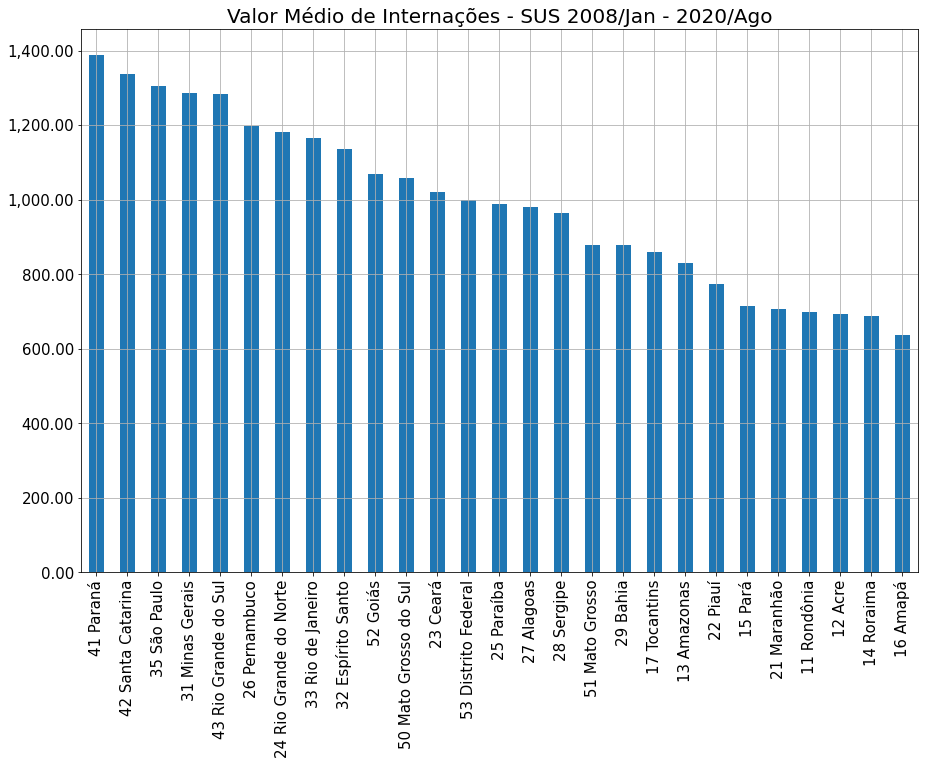

In [ ]:
grafico_barras(valor_medio_internacao['Total'].sort_values(ascending=False).T, 'Valor Médio de Internações - SUS 2008/Jan - 2020/Ago')

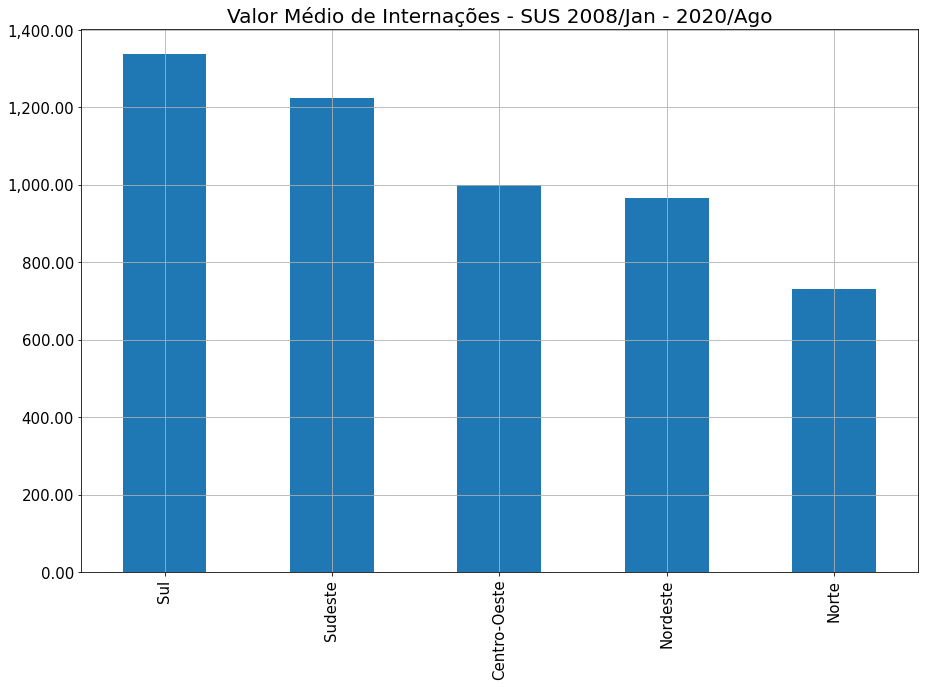

In [ ]:
grafico_barras(valor_medio_internacao_regiao['Total'].sort_values(ascending=False).T, 
               'Valor Médio de Internações - SUS 2008/Jan - 2020/Ago')

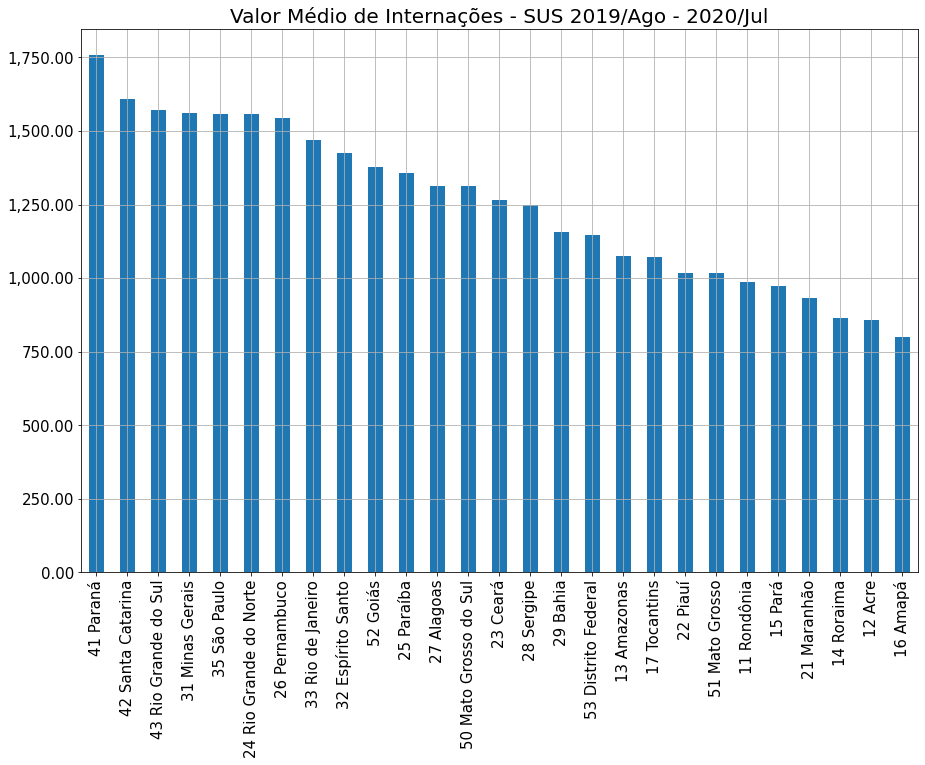

In [ ]:
grafico_barras(valor_medio_internacao.T.loc['2019/Ago': '2020/Jul'].mean().sort_values(ascending=False),
               'Valor Médio de Internações - SUS 2019/Ago - 2020/Jul')

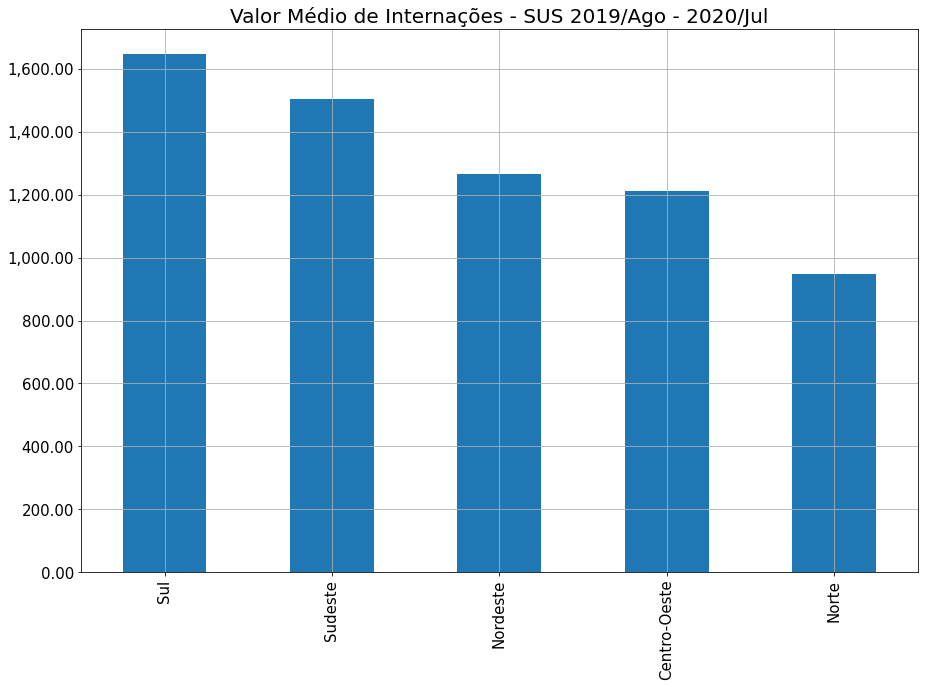

In [ ]:
grafico_barras(valor_medio_internacao_regiao.T.loc['2019/Ago': '2020/Jul'].mean().sort_values(ascending=False),
               'Valor Médio de Internações - SUS 2019/Ago - 2020/Jul')

In [ ]:
valor_medio_internacao_regiao_participacao = round((valor_medio_internacao_regiao['Total'] / valor_medio_internacao_regiao['Total'].sum()) * 100, 0).sort_values(ascending=False)
valor_medio_internacao_regiao_participacao = pd.DataFrame({
    'Região': valor_medio_internacao_regiao_participacao.index,
    'Valor Médio de Internações % (2008/Jan - 2020/Ago)': valor_medio_internacao_regiao_participacao.values
})
valor_medio_internacao_regiao_participacao.set_index('Região', inplace=True)
valor_medio_internacao_regiao_participacao

,Valor Médio de Internações % (2008/Jan - 2020/Ago)
Região,
Sul,25.0
Sudeste,23.0
Centro-Oeste,19.0
Nordeste,18.0
Norte,14.0


In [ ]:
diferenca_valor_medio_internacao_sul_sudeste = int(valor_medio_internacao_regiao_participacao.loc['Sul'].values - valor_medio_internacao_regiao_participacao.loc['Sudeste'].values)

In [ ]:
print(f'A região Sul possue {diferenca_valor_medio_internacao_sul_sudeste}% em '
'média por internação maior \ndo que a região Sudeste (período 2008/Jan - 2020/Ago).')

A região Sul possue 2% em média por internação maior 
do que a região Sudeste (período 2008/Jan - 2020/Ago).


####Respota 1

Resultado: Paraná, Santa Catarina, São Paulo, Minas Gerais e Rio Grande do Sul - Período de 2008/Jan - 2020/Ago.

Considerando o período de 2019/Ago - 2020/Jul os estados da região sul são os três primeiros.

Padrão observado: Dos cinco estados com maior valor médio estão presentes todos os estados da região Sul, e dois estados da região Sudeste;

A regiao sul apresenta o maior valor médio por internações.

####Questao 2: Por quê a região sul do páis possue o maior gasto médio por internação?

#####*Hipótese formulada*
A região sul do pais possue a menor população e o menor número de internações e consequentemente maior disponibilidade financeira de investimento no sistema do SUS, o que determina o maior valor médio por internação.

######Proposição 1 - A região sul possue o menor numero de internações

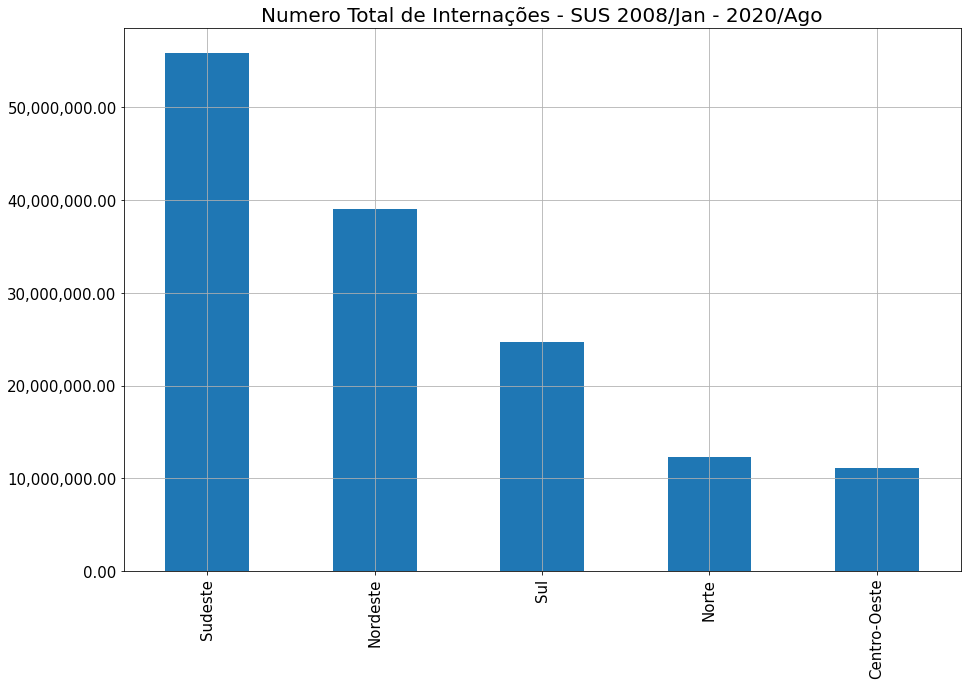

In [ ]:
grafico_barras(numero_internacao_regiao['Total'].sort_values(ascending=False).T, 'Numero Total de Internações - SUS 2008/Jan - 2020/Ago')

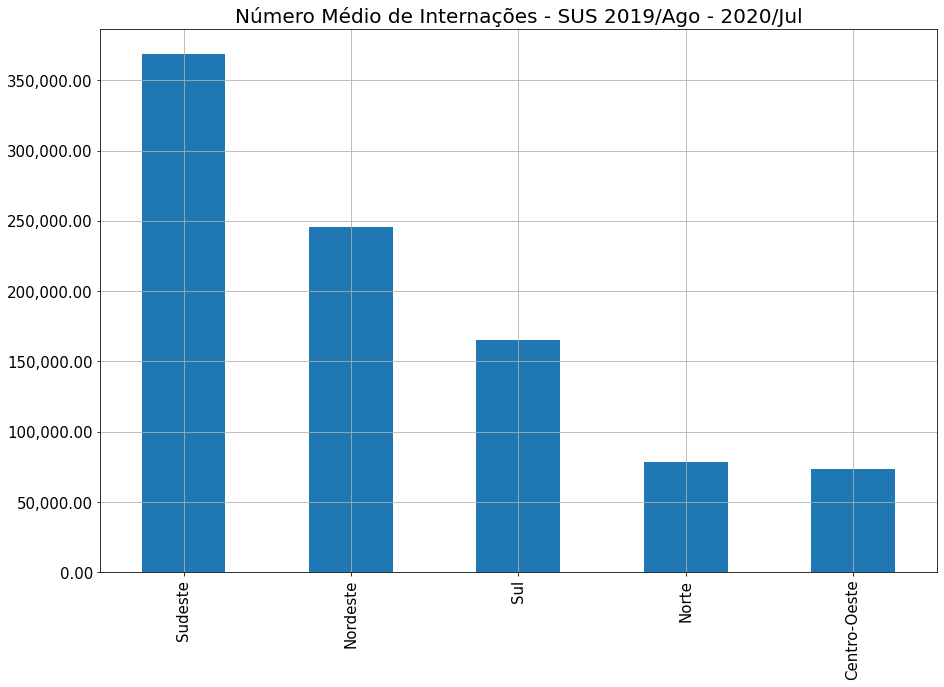

In [ ]:
grafico_barras(numero_internacao_regiao.T.loc['2019/Ago': '2020/Jul'].mean().sort_values(ascending=False),
               'Número Médio de Internações - SUS 2019/Ago - 2020/Jul')

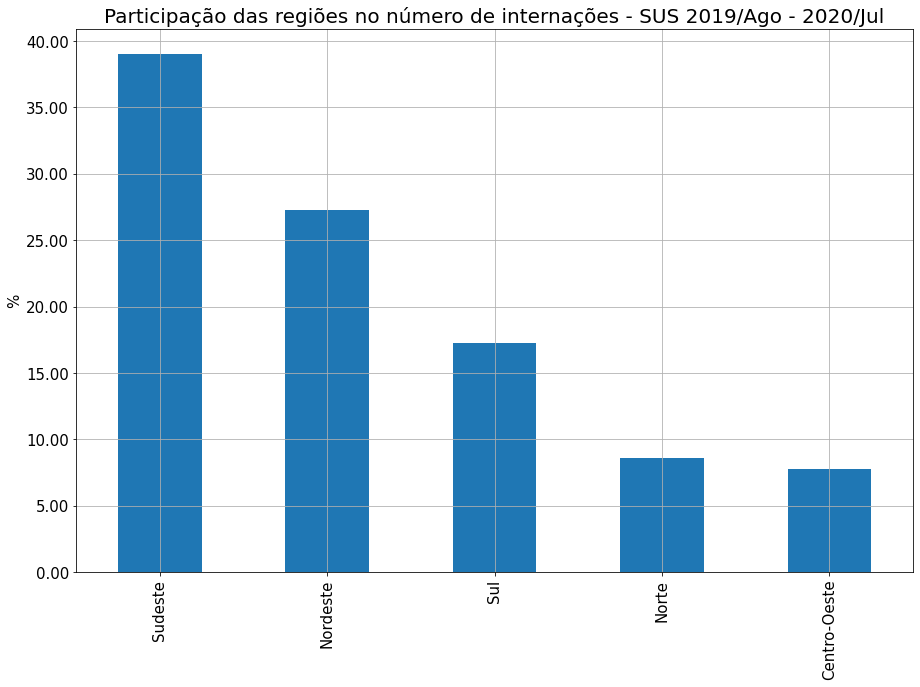

In [ ]:
grafico_barras(((numero_internacao_regiao.T.sum() / numero_internacao_regiao.T.sum().sum()) * 100).sort_values(ascending=False),
               'Participação das regiões no número de internações - SUS 2019/Ago - 2020/Jul',
               y_label='%')

In [ ]:
participacao_numero_internacoes = round((numero_internacao_regiao['Total'] / numero_internacao_regiao['Total'].sum()) * 100, 0).sort_values(ascending=False)
participacao_numero_internacoes = pd.DataFrame({
    'Região': participacao_numero_internacoes.index,
    'Internações % (2008/Jan - 2020/Jul)': participacao_numero_internacoes.values
})
participacao_numero_internacoes.set_index('Região', inplace=True)
participacao_numero_internacoes

,Internações % (2008/Jan - 2020/Jul)
Região,
Sudeste,39.0
Nordeste,27.0
Sul,17.0
Norte,9.0
Centro-Oeste,8.0


In [ ]:
diferenca_participacao_internacoes_sul_centro_oeste = int(participacao_numero_internacoes.loc["Sul"].values -  participacao_numero_internacoes.loc["Centro-Oeste"].values)

In [ ]:
print(f'A região Sul registrou {diferenca_participacao_internacoes_sul_centro_oeste}% mais internações do que a \nregião Centro-Oeste (período 2008/Jan - 2020/Jul)')

A região Sul registrou 9% mais internações do que a 
região Centro-Oeste (período 2008/Jan - 2020/Jul)


######Resultado 1 - Falso

Mesmo com o maior valor médio por internação a região Sul do país possue mais internações comparada a região Norte e Centro Oeste.

Como os dados consideram o local de internação é necessário considerar a taxa de internações de pacientes de outras regiões.

######Proposição 2: A região Sul posue o menor contingente populacional do país.

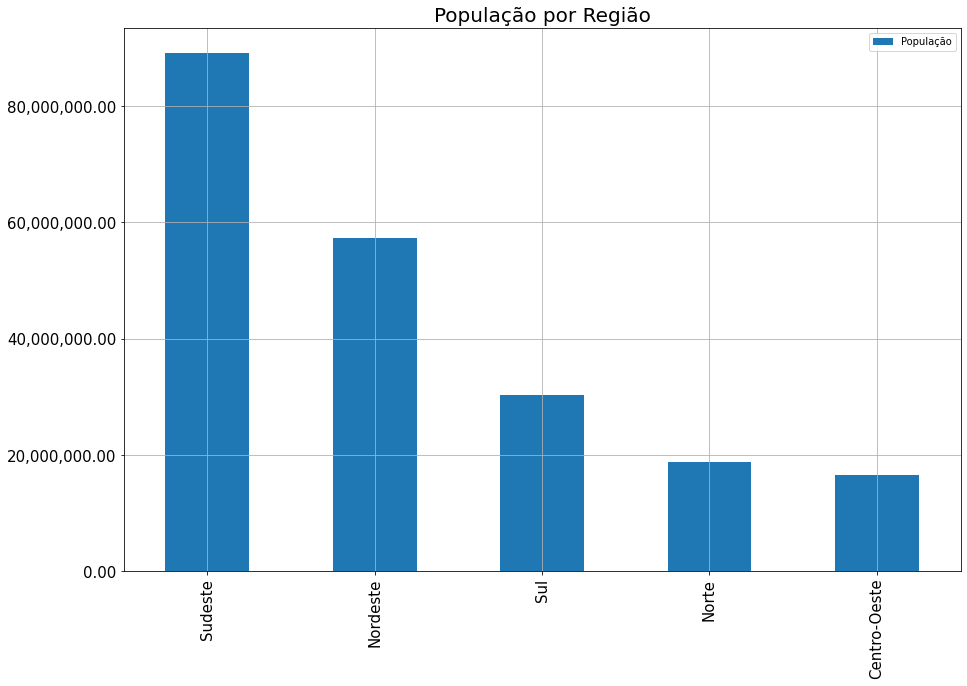

In [ ]:
grafico_barras(populacao_regiao.sort_values('População', ascending=False), 
               'População por Região')

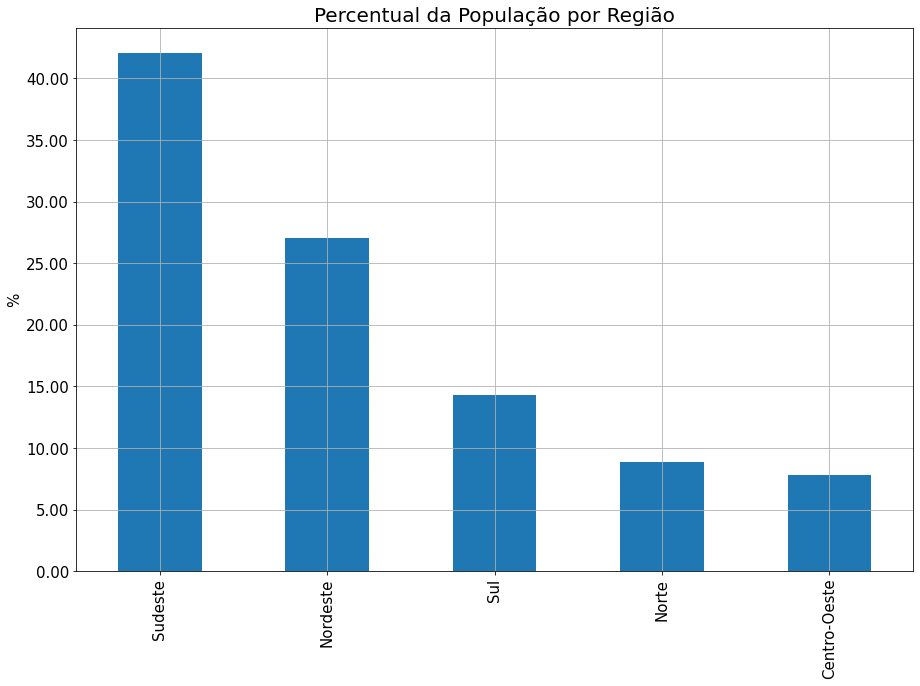

In [ ]:
grafico_barras(((populacao_regiao['População'] / populacao_regiao['População'].sum()) * 100).sort_values(ascending=False),
               'Percentual da População por Região', y_label='%')

In [ ]:
participacao_populacao_regiao = round((populacao_regiao / populacao_regiao.sum()) * 100, 0).sort_values('População', ascending=False)
participacao_populacao_regiao

,População
Região,
Sudeste,42.0
Nordeste,27.0
Sul,14.0
Norte,9.0
Centro-Oeste,8.0


In [ ]:
diferenca_participacao_populacao_sul_centro_oeste = int(participacao_populacao_regiao.loc["Sul"].values - participacao_populacao_regiao.loc["Centro-Oeste"].values)

In [ ]:
print(f'A região Sul é {diferenca_participacao_populacao_sul_centro_oeste}% maior em contingente populacional comparada a região Centro-Oeste.')

A região Sul é 6% maior em contingente populacional comparada a região Centro-Oeste.


######Resultado 2 - Falso

A região sul possue o terceiro maior contingente populacional.

######Proposição 3: A região Sul possue o maior gasto em produção hospitalar.

PROCEDIMENTOS HOSPITALARES DO SUS - POR LOCAL DE INTERNAÇÃO - BRASIL

http://tabnet.datasus.gov.br/cgi/sih/pidescr.htm

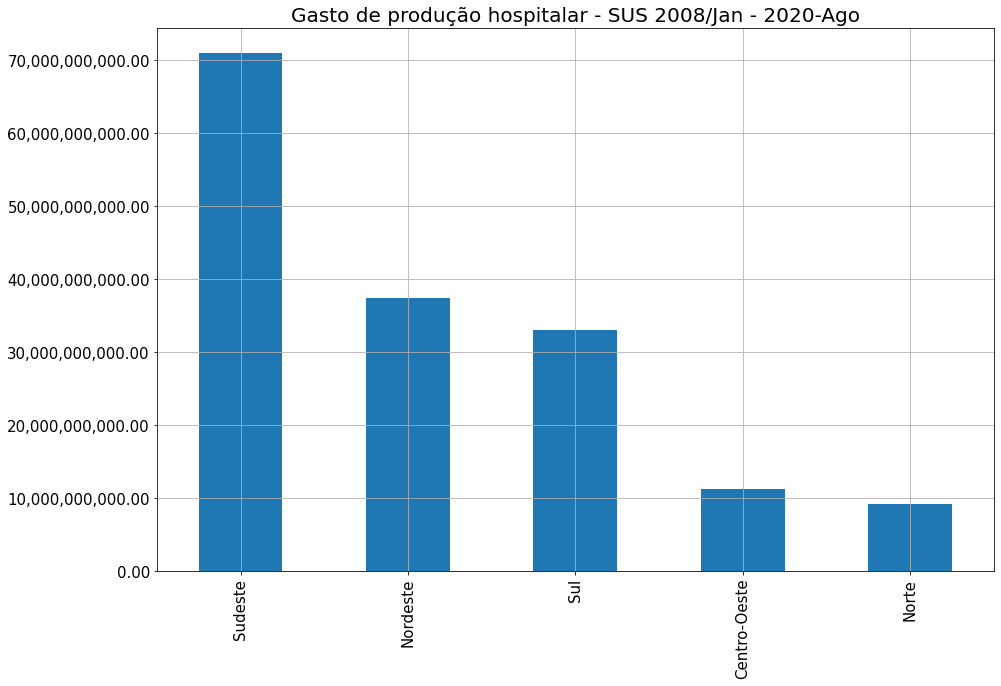

In [ ]:
grafico_barras(procedimentos_valor_regiao['Total'].T.sort_values(ascending=False),
               'Gasto de produção hospitalar - SUS 2008/Jan - 2020-Ago')

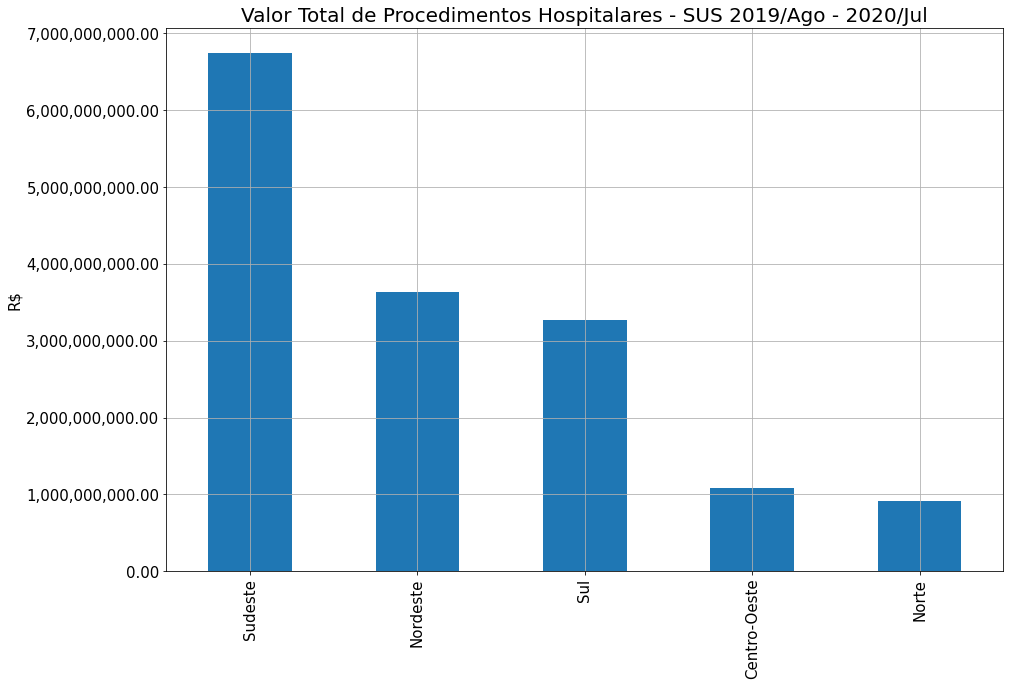

In [ ]:
grafico_barras(procedimentos_valor_regiao.T.loc['2019/Ago': '2020/Jul'].sum().sort_values(ascending=False),
               'Valor Total de Procedimentos Hospitalares - SUS 2019/Ago - 2020/Jul',
               y_label='R$')

In [ ]:
procedimentos_participacao_regiao = round((procedimentos_valor_regiao['Total'] / procedimentos_valor_regiao['Total'].sum()) * 100, 0).sort_values(ascending=False)
procedimentos_participacao_regiao = pd.DataFrame({
    'Região': procedimentos_participacao_regiao.index,
    'Procedimentos Hospitalares % (2008/Jan - 2020/Jul)': procedimentos_participacao_regiao.values
})
procedimentos_participacao_regiao.set_index('Região', inplace=True)
procedimentos_participacao_regiao

,Procedimentos Hospitalares % (2008/Jan - 2020/Jul)
Região,
Sudeste,44.0
Nordeste,23.0
Sul,20.0
Centro-Oeste,7.0
Norte,6.0


In [ ]:
diferenca_participacao_procedimentos_sudeste_sul = int(procedimentos_participacao_regiao.loc["Sudeste"].values - procedimentos_participacao_regiao.loc["Sul"].values)

In [ ]:
print(f'A região Sudeste gastou {diferenca_participacao_procedimentos_sudeste_sul}% a mais em produção hospitalar \ncomparada a região Sul (2008/Jan - 2020/JUl).')

A região Sudeste gastou 24% a mais em produção hospitalar 
comparada a região Sul (2008/Jan - 2020/JUl).


######Resultado 3 - Falso

A região sul não possue o maior gasto em produção hospitalar, as variáveis contingente populacional, número de internações e gasto em produção hospitalar indicam correlação positiva forte (quanto maior a população/ internações maior o gasto), mas não responde porque a região Sul possue o maior gasto médio por internação. 

######Proposição 4: Correlações
4.1 - Não há correlação entre o custo médio das internações com o número de internações; 

4.2 - Não há correlação entre o custo médio das internações com o gasto total dos procedimentos hospitalares.

In [ ]:
#Criar máscara para recortar o mapa de correlação
mask = np.zeros_like(df_correlacao_resultado)
mask[np.triu_indices_from(mask)] = True

Text(0.5, 1.0, 'Mapa de Correlação - SUS')

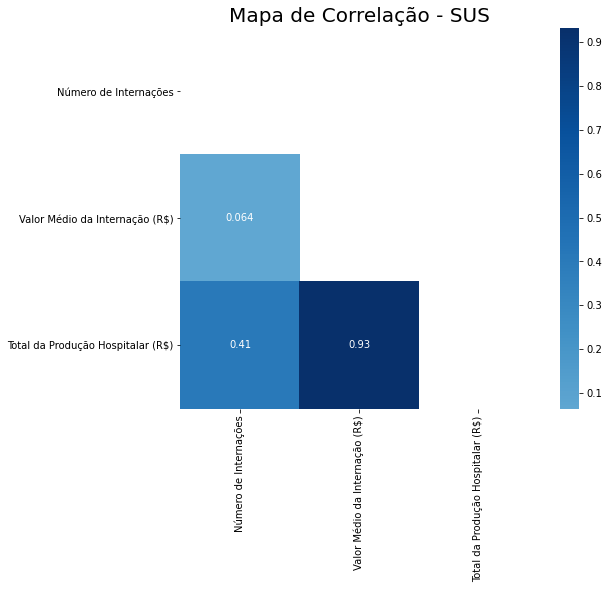

In [ ]:
plt.figure(figsize=(8, 7))
sns.heatmap(df_correlacao_resultado, cmap='Blues', annot=True, mask=mask,
            center=0)
plt.title('Mapa de Correlação - SUS', fontsize=20)

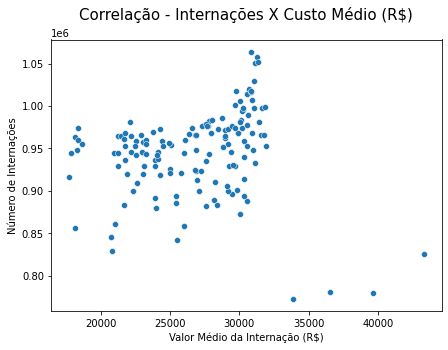

In [ ]:
plt.figure(figsize=(7, 5))
ax = sns.scatterplot(data=df_correlacao, x='Valor Médio da Internação (R$)',
                y='Número de Internações')
plt.title('Correlação - Internações X Custo Médio (R$)', fontsize=15, y=1.05)
plt.show()

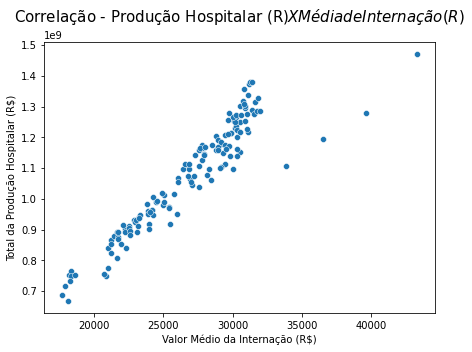

In [ ]:
plt.figure(figsize=(7, 5))
ax = sns.scatterplot(data=df_correlacao, x='Valor Médio da Internação (R$)',
                y='Total da Produção Hospitalar (R$)')
plt.title('Correlação - Produção Hospitalar (R$) X Média de Internação (R$)', 
          fontsize=15, y=1.05)
plt.show()

######Resultado 4 - Falso e falso.
 

Utilizando o teste de correlação de Person é possível validar que:

Existe correlação negativa entre o número de internações e o custo médio da internação (quanto maior o número de internações menor o custo médio);

Existe correlação positiva entre o valor total dos procedimentos e o valor médio das internações.

######Proposição 5 - Os dias de permanência no período de internação foram maiores na região Sul.

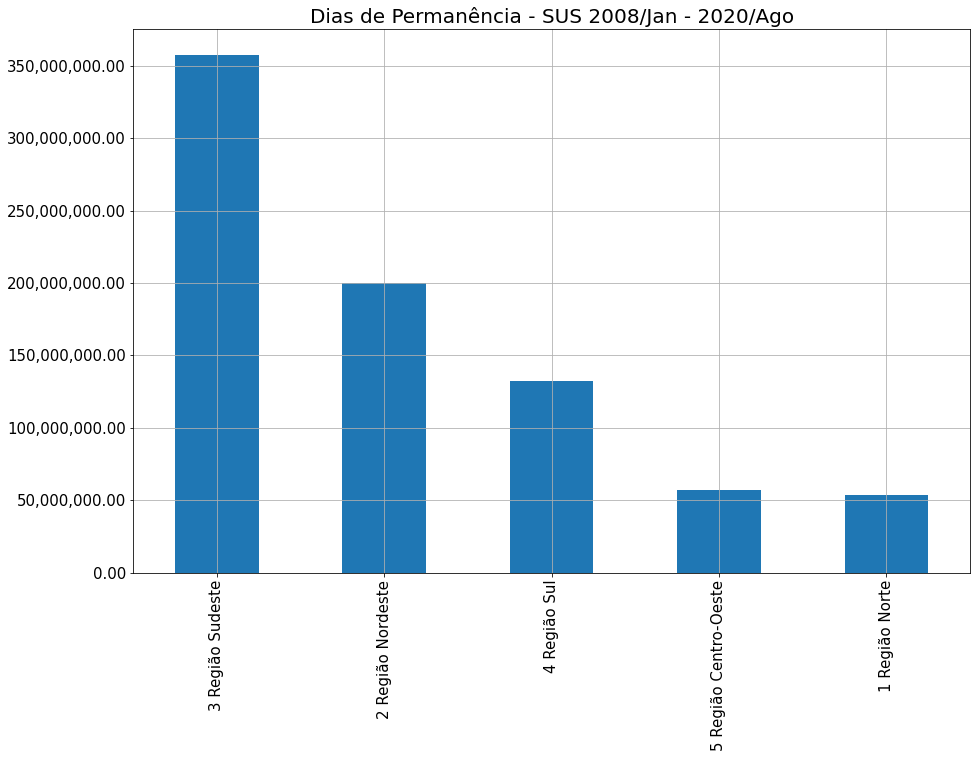

In [ ]:
grafico_barras(dias_permanencia['Total'].sort_values(ascending=False).T,
               'Dias de Permanência - SUS 2008/Jan - 2020/Ago')

In [ ]:
dias_permanencia_participacao = round((dias_permanencia['Total'] / dias_permanencia['Total'].sum()) * 100, 0).sort_values(ascending=False)
dias_permanencia_participacao = pd.DataFrame({
    'Região': dias_permanencia_participacao.index,
    'Dias de Permanência % (2008/Jan - 2020/Ago)': dias_permanencia_participacao.values
})
dias_permanencia_participacao.set_index('Região', inplace=True)
dias_permanencia_participacao

,Dias de Permanência % (2008/Jan - 2020/Ago)
Região,
3 Região Sudeste,45.0
2 Região Nordeste,25.0
4 Região Sul,17.0
5 Região Centro-Oeste,7.0
1 Região Norte,7.0


In [ ]:
diferenca_dias_permanencia_sudeste_sul = int(dias_permanencia_participacao.loc["3 Região Sudeste"].values - dias_permanencia_participacao.loc["4 Região Sul"].values)

In [ ]:
print(f'A região Sudeste registrou {diferenca_dias_permanencia_sudeste_sul}% a mais em dias de permanência \n' 
'comparada a região Sul (período 2008/Jan - 2020/Ago).')

A região Sudeste registrou 28% a mais em dias de permanência 
comparada a região Sul (período 2008/Jan - 2020/Ago).


######Resultado 5 - Falso.

######Proposição 6 - A média de permanência foi maior na região Sul.

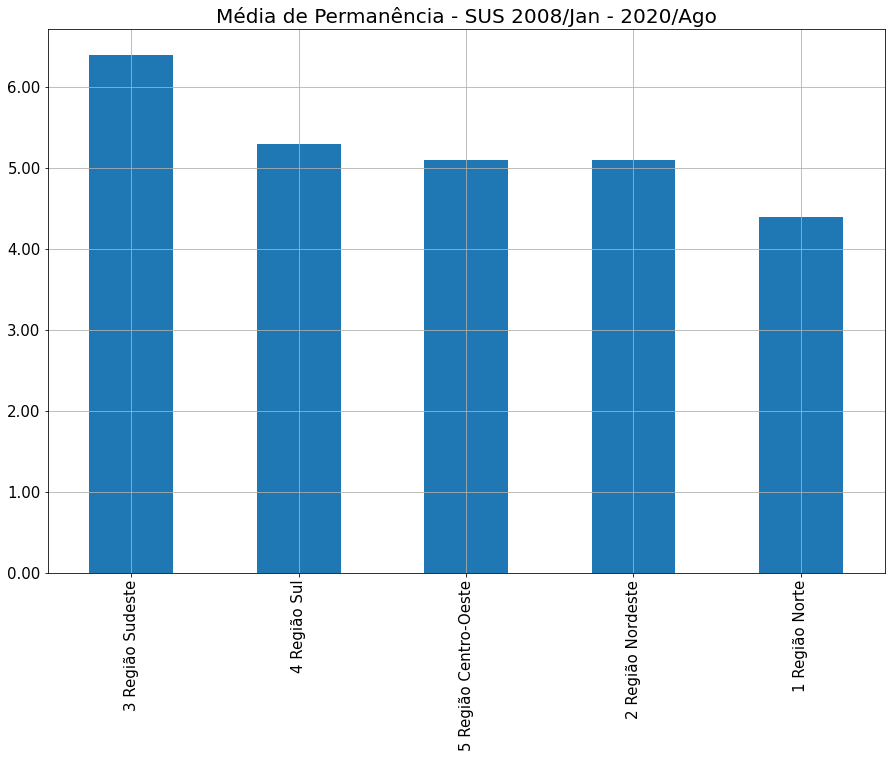

In [ ]:
grafico_barras(media_permanencia['Total'].sort_values(ascending=False).T,
               'Média de Permanência - SUS 2008/Jan - 2020/Ago')

In [ ]:
media_permanencia_total = media_permanencia['Total'].sort_values(ascending=False)
media_permanencia_total = pd.DataFrame({
    "Região": media_permanencia_total.index,
    "Dias Médios de Permanência (2008/Jan - 2020/Ago)": media_permanencia_total.values
})
media_permanencia_total.set_index('Região', inplace=True)
media_permanencia_total

,Dias Médios de Permanência (2008/Jan - 2020/Ago)
Região,
3 Região Sudeste,6.4
4 Região Sul,5.3
5 Região Centro-Oeste,5.1
2 Região Nordeste,5.1
1 Região Norte,4.4


In [ ]:
diferenca_dias_medios_sudeste_sul = round(float(media_permanencia_total.loc["3 Região Sudeste"].values - media_permanencia_total.loc["4 Região Sul"].values), 1)

In [ ]:
print(f'A região Sudeste possue {diferenca_dias_medios_sudeste_sul} mais dias de permanência do que a região Sul (perído 2008/Jan - 2020/Ago).')

A região Sudeste possue 1.1 mais dias de permanência do que a região Sul (perído 2008/Jan - 2020/Ago).


######Resultado 6 - Falso.

######Proposição 7 - Os três maiores estados da região Sudeste possuem maior média de gastos comparada a região Sul.

O maior gasto medio da região Sul pode ser explicado pelo fato de as demais regiões possuirem mais estados, o que pode estar puxando a média dessas regiões para baixo.

Estados selecionados por região:

Norte: Tocantins, Amazonas e Pará; 

Nordeste: Ceará, Pernambuco e Rio Grande do Norte';

Sudeste: Minas Gerais, Rio de Janeiro e São Paulo;

Sul: Paraná, Santa Catarina e Rio Grande do Sul; 

Centro-Oeste: Mato Grosso do Sul, Goiás e Distrito Federal.

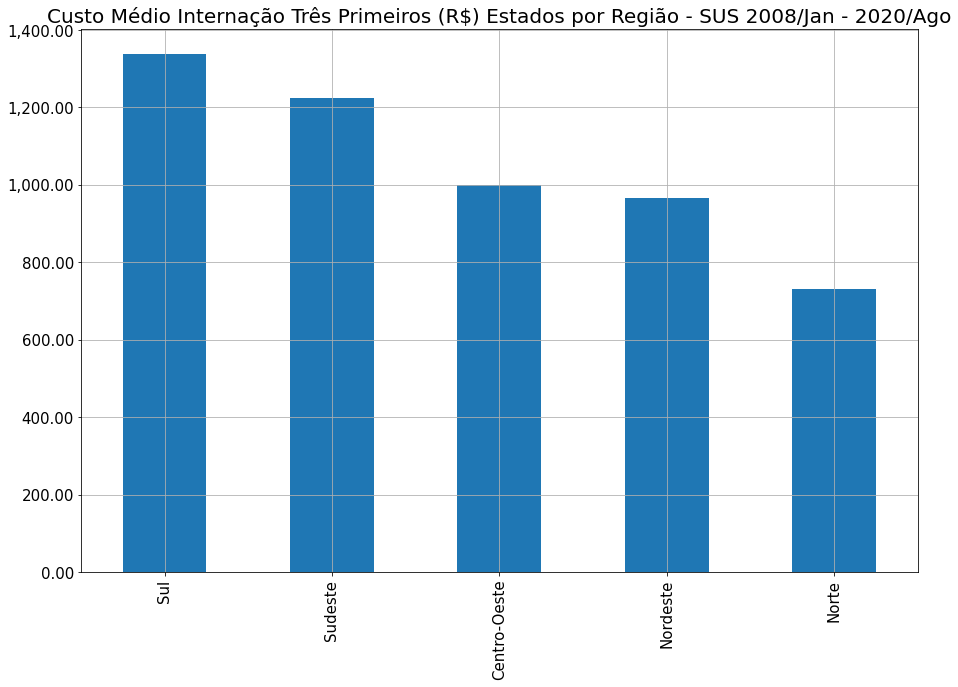

In [ ]:
grafico_barras(media_valor_regiao_tres_primeiros_estados['Total'].sort_values(ascending=False), 
               'Custo Médio Internação Três Primeiros (R$) Estados por Região - SUS 2008/Jan - 2020/Ago')

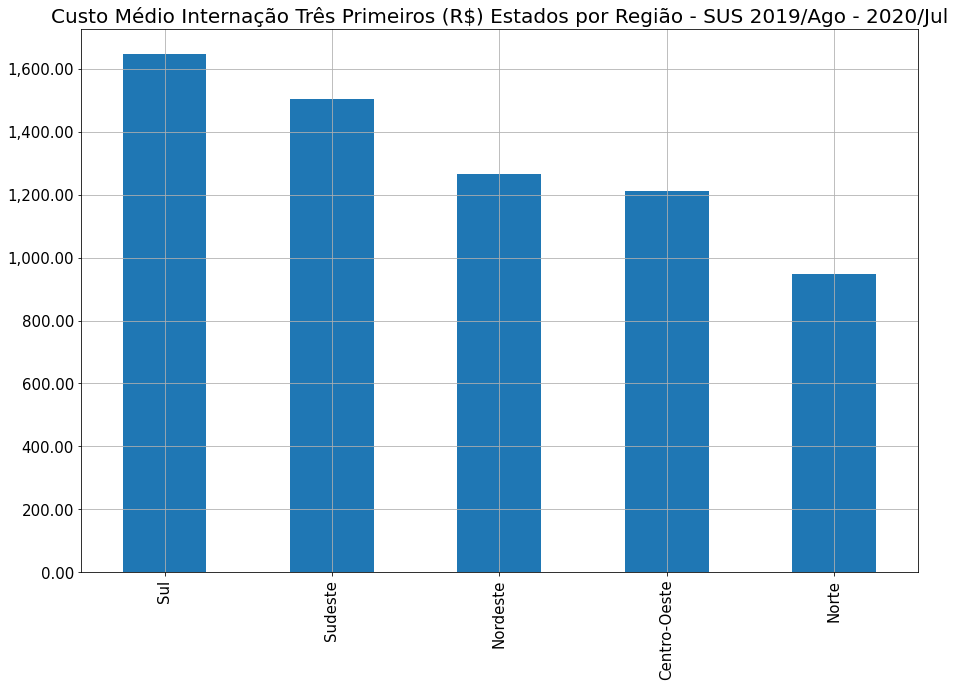

In [ ]:
grafico_barras(media_valor_regiao_tres_primeiros_estados.T.loc['2019/Ago':'2020/Jul'].mean().sort_values(ascending=False),
               'Custo Médio Internação Três Primeiros (R$) Estados por Região - SUS 2019/Ago - 2020/Jul')

######Resultado 7 - Falso

#####*Resultado da Hipótese*

A região sul do pais não possue a menor população;

O número de internações não é o menor do país.

Os custos de procedimentos hospitalares da região Sul não é o maior do país.

A região sul não possue mais dias de permanência.

A região sul não possue a maior média de dias de permanência.

Reduzindo o número de estados para igular ao número de estados da região Sul não altera a ordem do gasto médio por região.

#####Considerações:



Tendo como base as variáveis estudas não foi possível afirmar o motivo de a região Sul possuir maiores valores médios em produção hospitalar, visto que as outras variáveis seguem uma tendência onde a região Sudeste aparece com maiores números e a região Sul aparece com o terceiro (ou segundo) maior número; 

Variáveis estudadas: 

Número de internações; 

Contingênte populacional; 

Gasto em produção hospitalar; 

Dias de permanência no período de internação;

Média de permanência por internação;

O valor médio por internação foi uma exceção das tendências observadas.

###*Referências*

DATASUS. Tabnet - Produção Hospitalar. Disponível em: https://datasus.saude.gov.br/informacoes-de-saude-tabnet/. Acesso em: 04 Nov. 2020.

WIKIPÉDIA. Lista de unidades federativas do Brasil por população. Disponivel em: https://pt.m.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o. Acesso em: 12 Nov. 2020

###*Contato*

Marcos Galvão

Linkedin: https://www.linkedin.com/in/marcosrmgalvao/

Github: https://github.com/MarcosRMG